# **Visualize our dataset in many ways** 

In [1]:
!pip install pandas matplotlib seaborn wordcloud


### load the CSV file and plot each party in %.

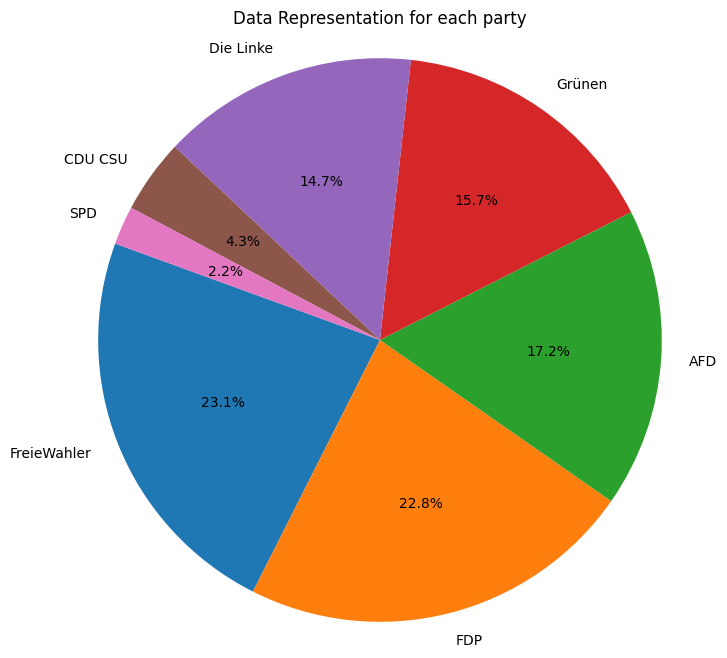

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Daten.csv')

parties = df['Partei'].value_counts()
party_proz = parties / parties.sum() * 100

plt.figure(figsize=(8, 8))
plt.pie(party_proz, labels=party_proz.index, autopct='%1.1f%%', startangle=160)
plt.title("Data Representation for each party")
plt.axis('equal')
plt.show()
